<a href="https://colab.research.google.com/github/quvyshnav/Data-Analysis/blob/main/videogame_sales_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
pip install opendatasets --upgrade --quiet

In [72]:
import opendatasets as od
dataset_url = 'https://www.kaggle.com/datasets/asaniczka/video-game-sales-2024/data'
od.download(dataset_url)

Skipping, found downloaded files in "./video-game-sales-2024" (use force=True to force download)


In [73]:
dat = './video-game-sales-2024/vgchartz-2024.csv'

In [74]:
# Suppress warnings for a cleaner output
import warnings
warnings.filterwarnings('ignore')

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import seaborn as sns
sns.set(style='whitegrid')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Inline plotting for Kaggle notebooks
%matplotlib inline

# Set figure size for plots
plt.rcParams['figure.figsize'] = (10, 6)

In [75]:
df = pd.read_csv(data,index_col=0)
df.head()

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
img,,,,,,,,,,,,,
/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14


In [76]:
df.shape

(64016, 13)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64016 entries, /games/boxart/full_6510540AmericaFrontccc.jpg to /games/boxart/default.jpg
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         64016 non-null  object 
 1   console       64016 non-null  object 
 2   genre         64016 non-null  object 
 3   publisher     64016 non-null  object 
 4   developer     63999 non-null  object 
 5   critic_score  6678 non-null   float64
 6   total_sales   18922 non-null  float64
 7   na_sales      12637 non-null  float64
 8   jp_sales      6726 non-null   float64
 9   pal_sales     12824 non-null  float64
 10  other_sales   15128 non-null  float64
 11  release_date  56965 non-null  object 
 12  last_update   17879 non-null  object 
dtypes: float64(6), object(7)
memory usage: 6.8+ MB


In [78]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
critic_score,6678.0,7.220440,1.457066,1.0,6.40,7.50,8.30,10.00
total_sales,18922.0,0.349113,0.807462,0.0,0.03,0.12,0.34,20.32
na_sales,12637.0,0.264740,0.494787,0.0,0.05,0.12,0.28,9.76
jp_sales,6726.0,0.102281,0.168811,0.0,0.02,0.04,0.12,2.13
pal_sales,12824.0,0.149472,0.392653,0.0,0.01,0.04,0.14,9.85
other_sales,15128.0,0.043041,0.126643,0.0,0.00,0.01,0.03,3.12


In [79]:
df.columns

Index(['title', 'console', 'genre', 'publisher', 'developer', 'critic_score',
       'total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales',
       'release_date', 'last_update'],
      dtype='object')

In [80]:
df.isna().sum()

,0
title,0
console,0
genre,0
publisher,0
developer,17
critic_score,57338
total_sales,45094
na_sales,51379
jp_sales,57290
pal_sales,51192


1. Top Selling Games:

Identify top 10 best-selling games and their popular platforms.

2. Genre Performance:

Explore genres with highest critic scores and sales.
Analyze total sales by genre.

3. Publisher Influence:

Examine publishers with most releases and their sales performance.
Compare sales among different publishers.

4. Regional Preferences:

Analyze genre preferences across regions.
Examine sales distribution in North America, Japan, and PAL regions.

5. Platform Lifecycle:

Compare sales trends between older and newer platforms.
Identify platforms with highest average sales per game.

6. Release Date Impact:

Explore correlation between release dates and sales performance.

7. Developer Influence:

Examine influence of developers on critic scores and sales.

8. Longevity of Sales:

Identify games with sustained long-term sales.
Explore factors contributing to their success.

9. Effect of Critic:

Explore the impact of critic reviews on game performance.


#Top Selling Games:

In [81]:
top_sell = df.groupby('title')['total_sales'].sum().sort_values(ascending=False).head(10)
top_sell

,total_sales
title,
Grand Theft Auto V,64.29
Call of Duty: Black Ops,30.99
Call of Duty: Modern Warfare 3,30.71
Call of Duty: Black Ops II,29.59
Call of Duty: Ghosts,28.80
Call of Duty: Black Ops 3,26.72
Call of Duty: Modern Warfare 2,25.02
Minecraft,24.01
Grand Theft Auto IV,22.53


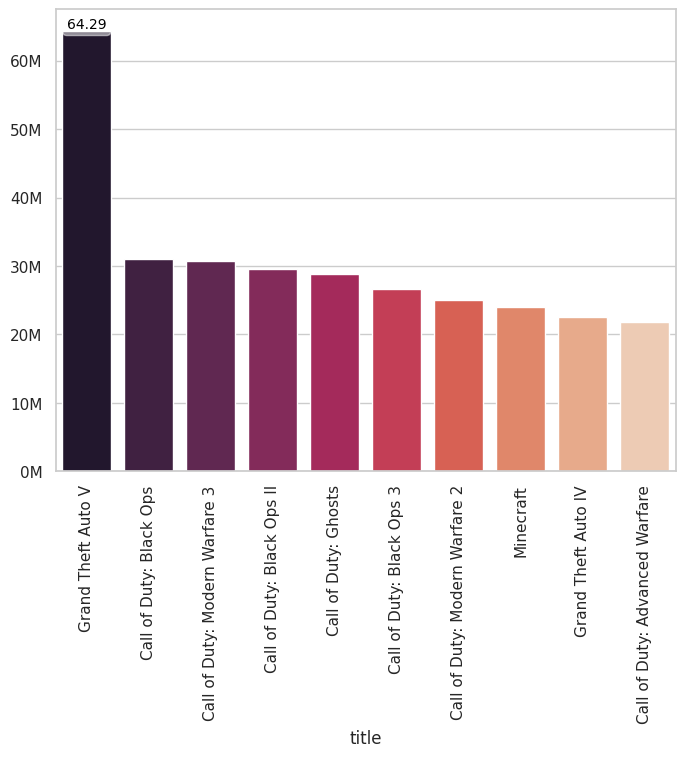

In [82]:
plt.figure(figsize=(8,6))
ax=sns.barplot(x=top_sell.index,y=top_sell.values,palette='rocket')
ax.bar_label(ax.containers[0], label_type='edge', fontsize=10, color='black',
              bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.5))
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}M'))

plt.xticks(rotation=90)
plt.show()

# Top Selling Games by Platform

In [83]:
platforms = df.groupby(['title', 'console'])['total_sales'].sum().sort_values(ascending=False).head(10)
platforms

title                           console
Grand Theft Auto V              PS3        20.32
                                PS4        19.39
Grand Theft Auto: Vice City     PS2        16.15
Grand Theft Auto V              X360       15.86
Call of Duty: Black Ops 3       PS4        15.09
Call of Duty: Modern Warfare 3  X360       14.82
Call of Duty: Black Ops         X360       14.74
Red Dead Redemption 2           PS4        13.94
Call of Duty: Black Ops II      X360       13.86
                                PS3        13.80
Name: total_sales, dtype: float64

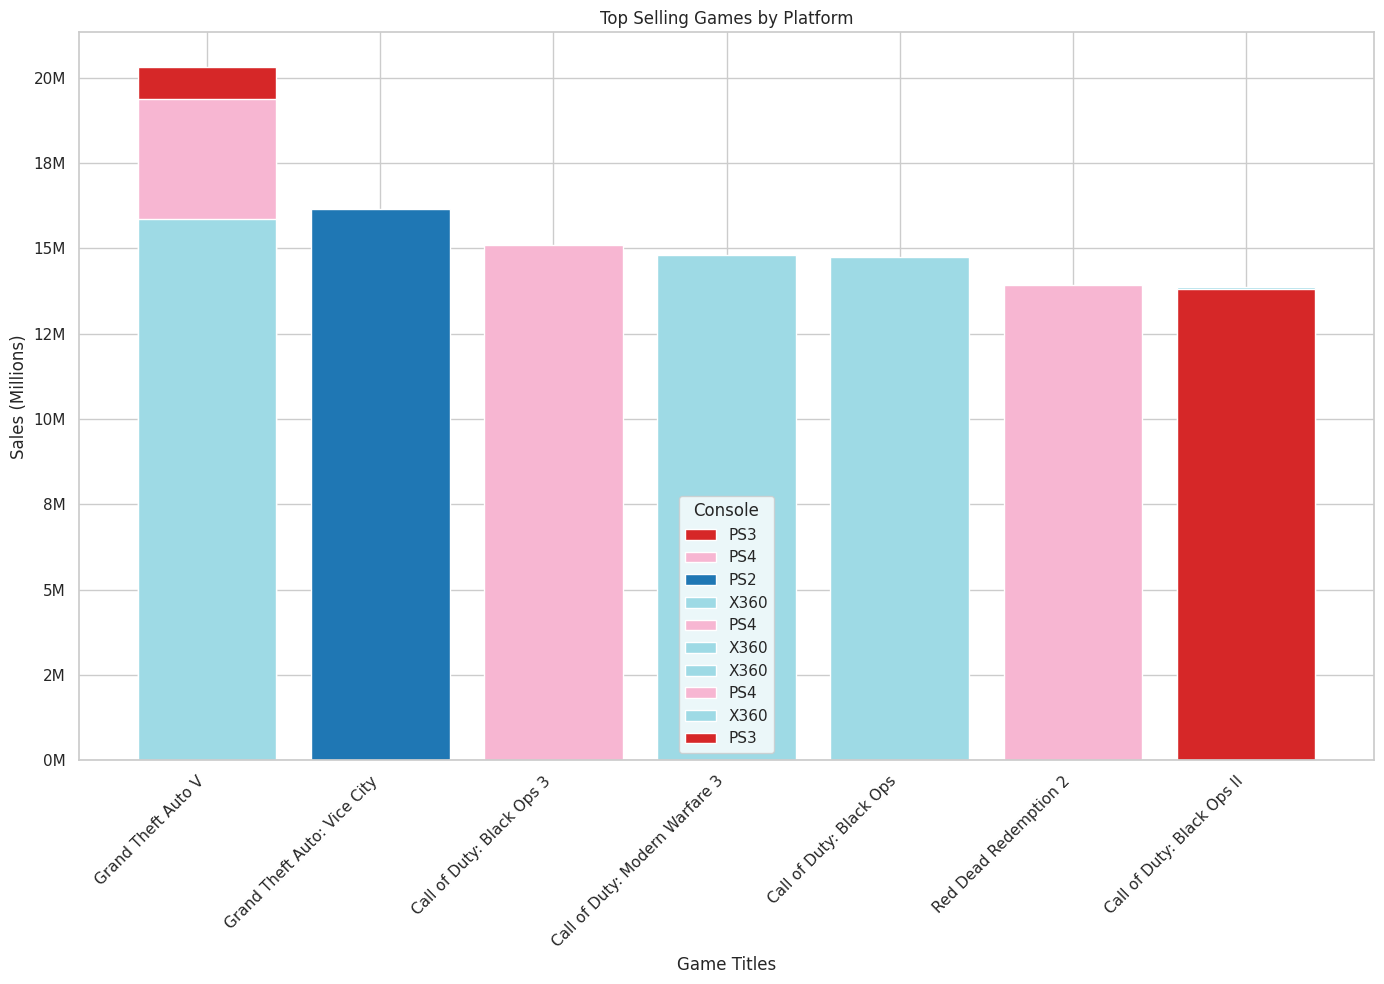

In [84]:
titles = [index[0] for index in platforms.index]
consoles = [index[1] for index in platforms.index]
sales = platforms.values
unique_consoles = np.unique(consoles)
colors = plt.cm.tab20(np.linspace(0, 1, len(unique_consoles)))
console_colors = dict(zip(unique_consoles, colors))

# Convert sales to millions
sales_in_millions = sales  # dividing by 1 million to get the values in millions
#sales_in_millions = sales / 1e6  # dividing by 1 million to get the values in millions

plt.figure(figsize=(14, 10))
for i in range(len(titles)):
    console = consoles[i]
    color = console_colors[console]
    plt.bar(titles[i], sales_in_millions[i], color=color, label=console)

plt.xlabel('Game Titles')
plt.ylabel('Sales (Millions)')
plt.title('Top Selling Games by Platform')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Console',loc='best')

# Add "Millions" to y-axis tick labels
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}M'))

plt.tight_layout()
plt.show()

# Genres with highest critic scores and sales :

In [90]:
genre_stats = df.groupby('genre').agg({'total_sales':'sum',
                                       'critic_score':'median'})
genre_by_sales = genre_stats.sort_values(by='total_sales',ascending=False)
genre_by_critic_score = genre_stats.sort_values(by='critic_score',ascending=False)

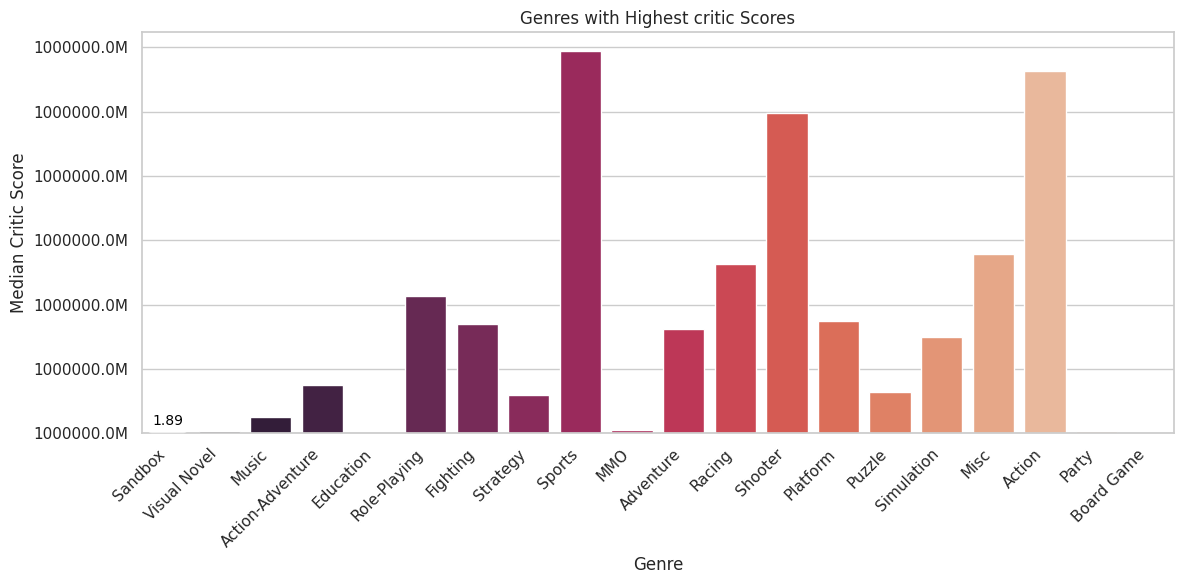

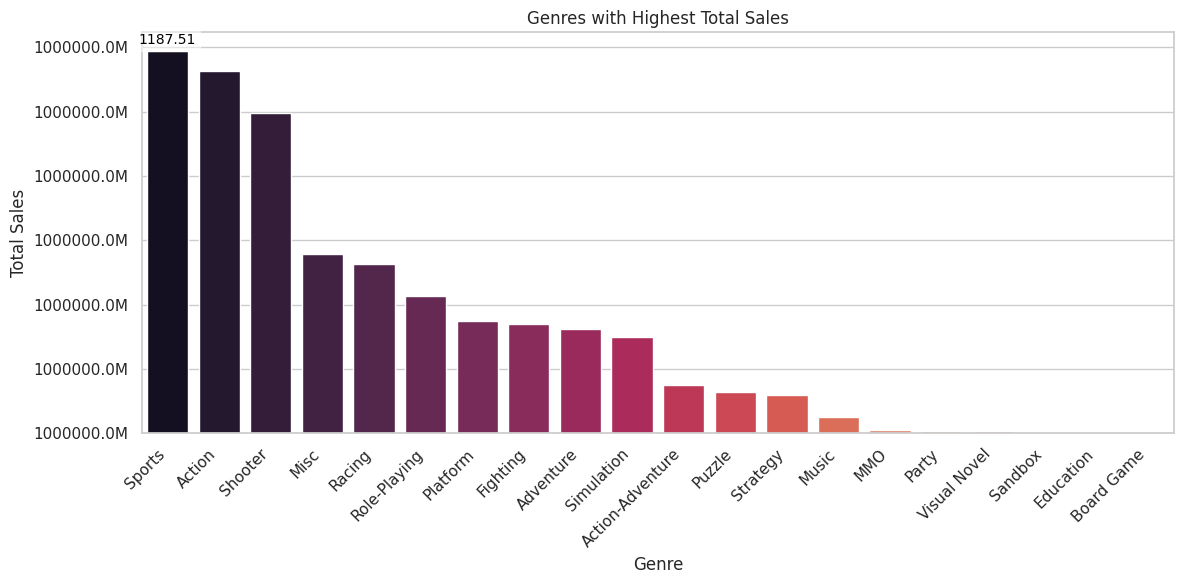

In [101]:
palette = sns.color_palette('rocket',len(genre_by_critic_score))

plt.figure(figsize=(12,6))
ax1 = sns.barplot(x=genre_by_critic_score.index,y=genre_by_critic_score['total_sales'],palette=palette)
ax1.bar_label(ax1.containers[0],label_type='edge',fontsize=10, color='black', padding=3,
              bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.5))
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{1e6:.1f}M'))
plt.title('Genres with Highest critic Scores')
plt.xlabel('Genre')
plt.ylabel('Median Critic Score')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
ax2=sns.barplot(x=genre_by_sales.index, y=genre_by_sales['total_sales'], palette=palette)
ax2.bar_label(ax2.containers[0], label_type='edge', fontsize=10, color='black',padding=3,
              bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.5))
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{1e6:.1f}M'))
plt.title('Genres with Highest Total Sales')
plt.xlabel('Genre')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Publishers with most releases and their sales performance :

In [103]:
publisher_stats = df.groupby('publisher').agg({
    'title': 'count',
    'total_sales': 'sum'
}).reset_index()
publisher_stats

,publisher,title,total_sales
0,100 Gates,2,0.00
1,10TACLE Studios,6,0.48
2,10tons,7,0.00
3,10tons Ltd,32,0.00
4,11 bit studios,44,0.04
...,...,...,...
3378,tono / Ctrl+k,1,0.00
3379,tri-Ace,1,0.00
3380,uClick,2,0.00
3381,wooga,4,0.00


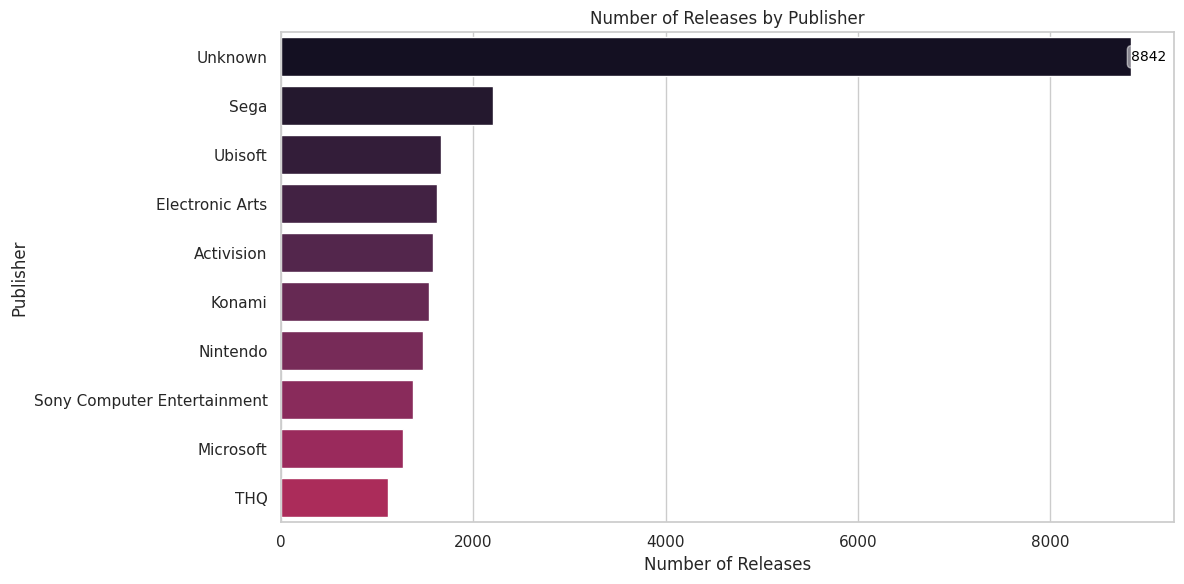

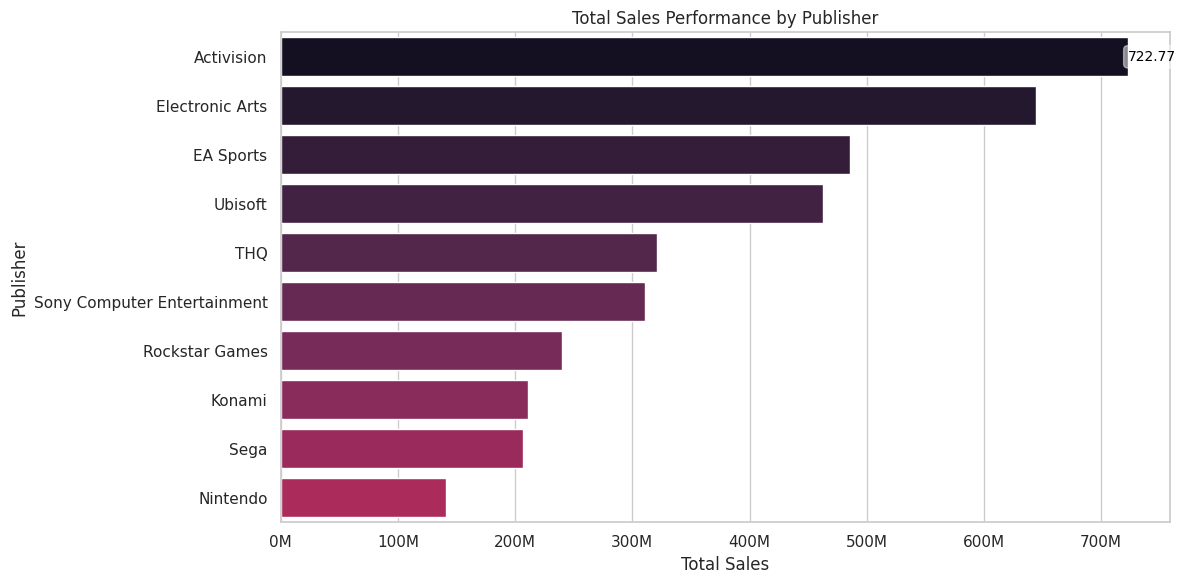

In [104]:
# Sort publishers by number of releases
sorted_publishers_by_num = publisher_stats.sort_values(by='title', ascending=False).head(10)
sorted_publishers_by_sales = publisher_stats.sort_values(by='total_sales', ascending=False).head(10)
palette = sns.color_palette("rocket", len(genre_by_critic_score))

plt.figure(figsize=(12, 6))
ax=sns.barplot(x='title', y='publisher', data=sorted_publishers_by_num, palette=palette)
ax.bar_label(ax.containers[0],label_type='edge',fontsize=10,color='black',
            bbox=dict(boxstyle='round,pad=0.3',facecolor='white',alpha=0.5))
plt.title('Number of Releases by Publisher')
plt.xlabel('Number of Releases')
plt.ylabel('Publisher')
plt.tight_layout()
plt.show()

# Plot sales performance by publisher
plt.figure(figsize=(12, 6))
ax=sns.barplot(x='total_sales', y='publisher', data=sorted_publishers_by_sales, palette=palette)
ax.bar_label(ax.containers[0],label_type='edge',fontsize=10,color='black',
            bbox=dict(boxstyle='round,pad=0.3',facecolor='white',alpha=0.5))
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}M'))

plt.title('Total Sales Performance by Publisher')
plt.xlabel('Total Sales')
plt.ylabel('Publisher')
plt.tight_layout()
plt.show()

# Compares sales among different publishers :

In [105]:
publisher_sales = df.groupby('publisher')['total_sales'].sum().reset_index().sort_values(by='total_sales',ascending=False).head(100)
publisher_sales



,publisher,total_sales
101,Activision,722.77
852,Electronic Arts,644.13
813,EA Sports,485.66
3043,Ubisoft,462.57
2818,THQ,320.89
...,...,...
1349,Idea Factory,4.59
1748,Mattel Interactive,4.41
90,Accolade,4.29
2965,Tomy Corporation,4.26


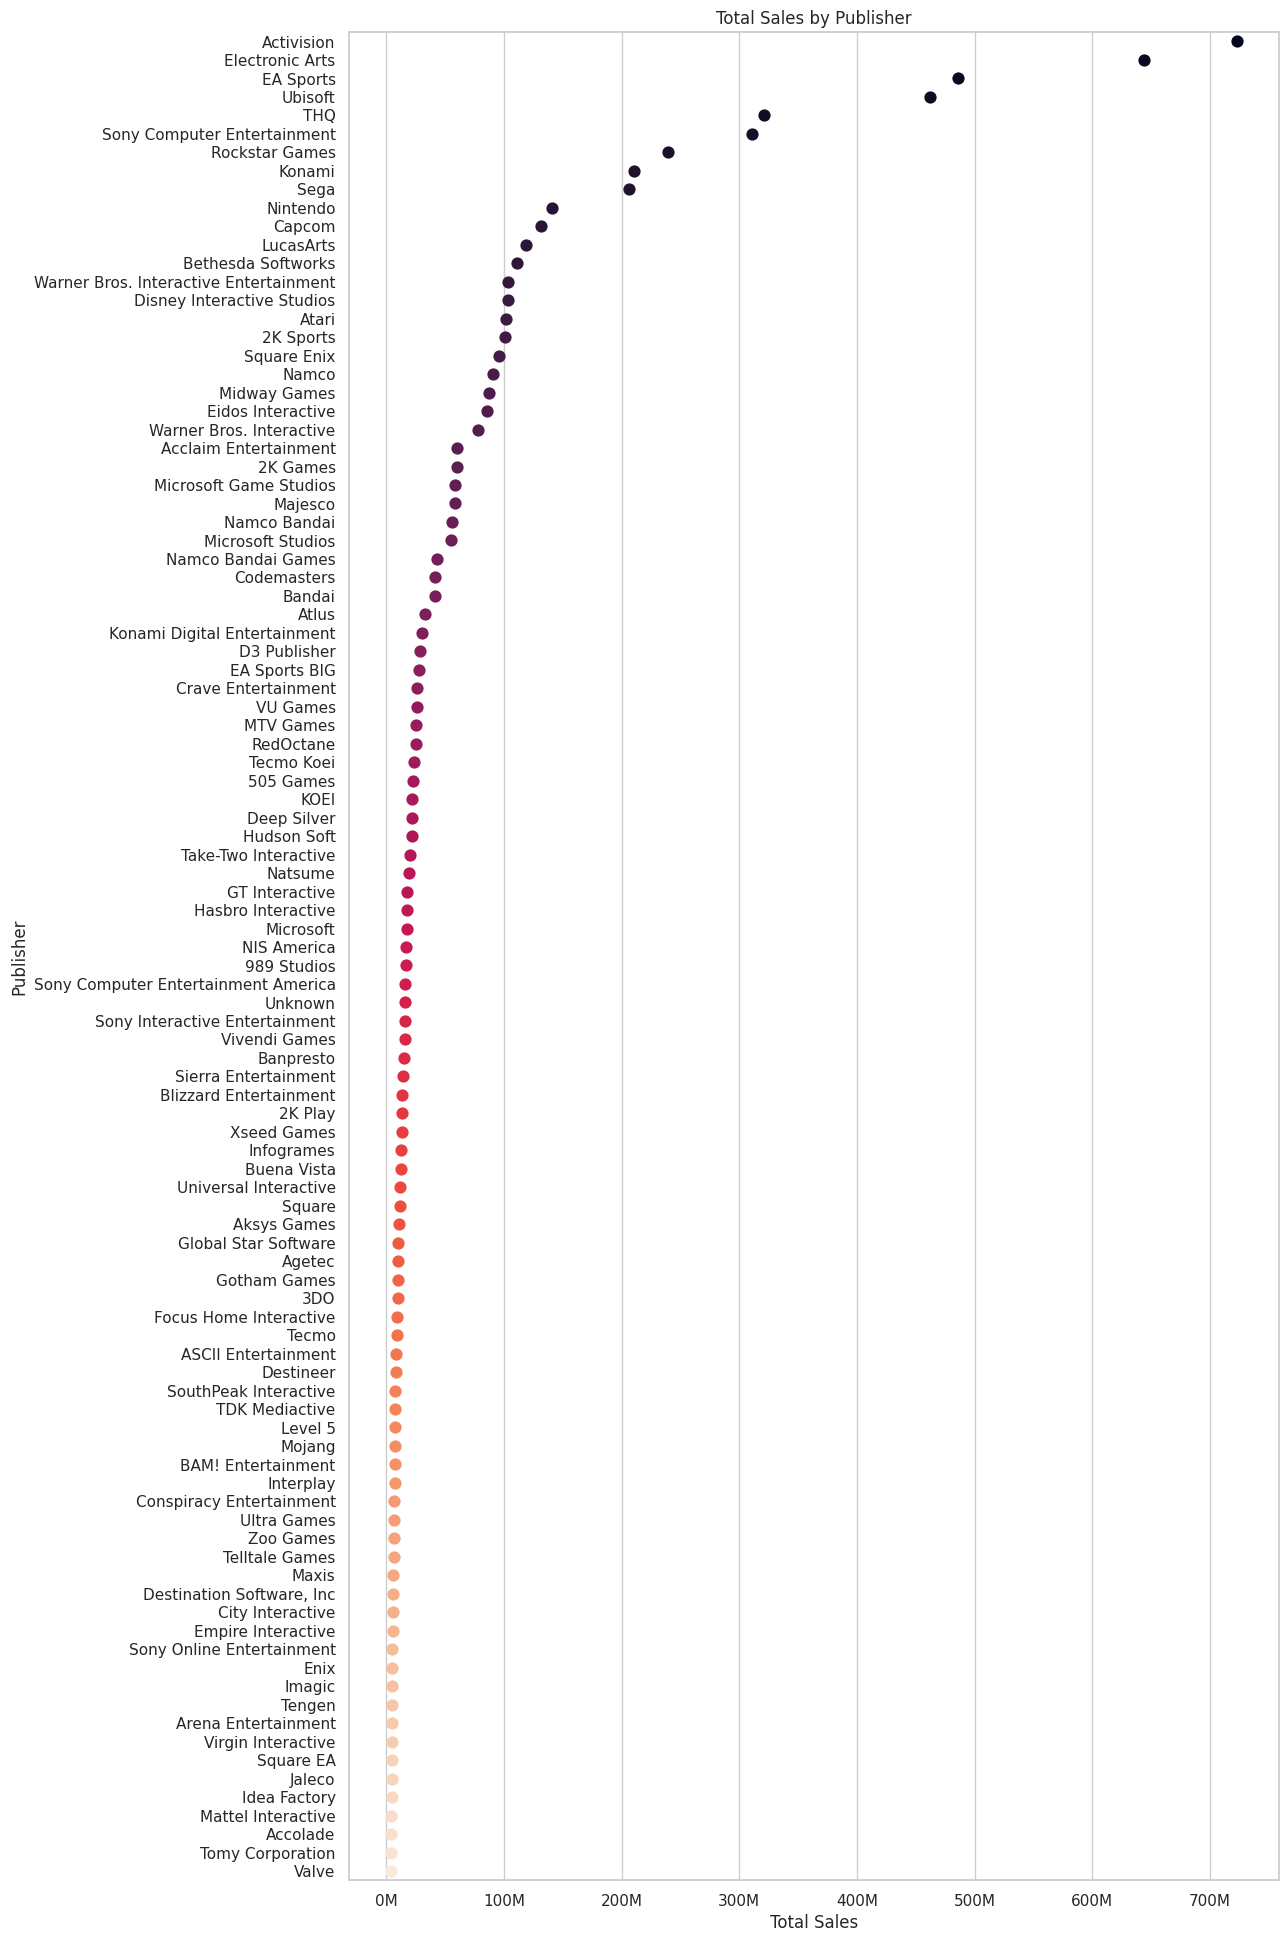

In [108]:
plt.figure(figsize=(12,24))
ax=sns.pointplot(y='publisher',x='total_sales',data=publisher_sales,palette='rocket')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}M'))

plt.xlabel('Total Sales')
plt.ylabel('Publisher')
plt.title('Total Sales by Publisher')
plt.show()

# Analyze genre preferences across regions

In [109]:
genre_sales = df.groupby('genre')[['na_sales', 'pal_sales', 'jp_sales', 'other_sales']].sum()
genre_sales

,na_sales,pal_sales,jp_sales,other_sales
genre,,,,
Action,589.69,342.52,80.30,112.41
Action-Adventure,65.09,59.52,5.46,18.40
Adventure,157.26,91.52,46.11,30.11
Board Game,0.06,0.22,0.04,0.02
Education,0.68,0.20,0.00,0.08
Fighting,173.96,79.84,58.61,28.65
MMO,3.95,2.94,1.39,1.03
Misc,295.66,146.71,56.24,58.52
Music,25.97,15.02,5.84,4.93


In [114]:
norm_genre_sales = genre_sales.div(genre_sales.sum(axis=1), axis=0)*100

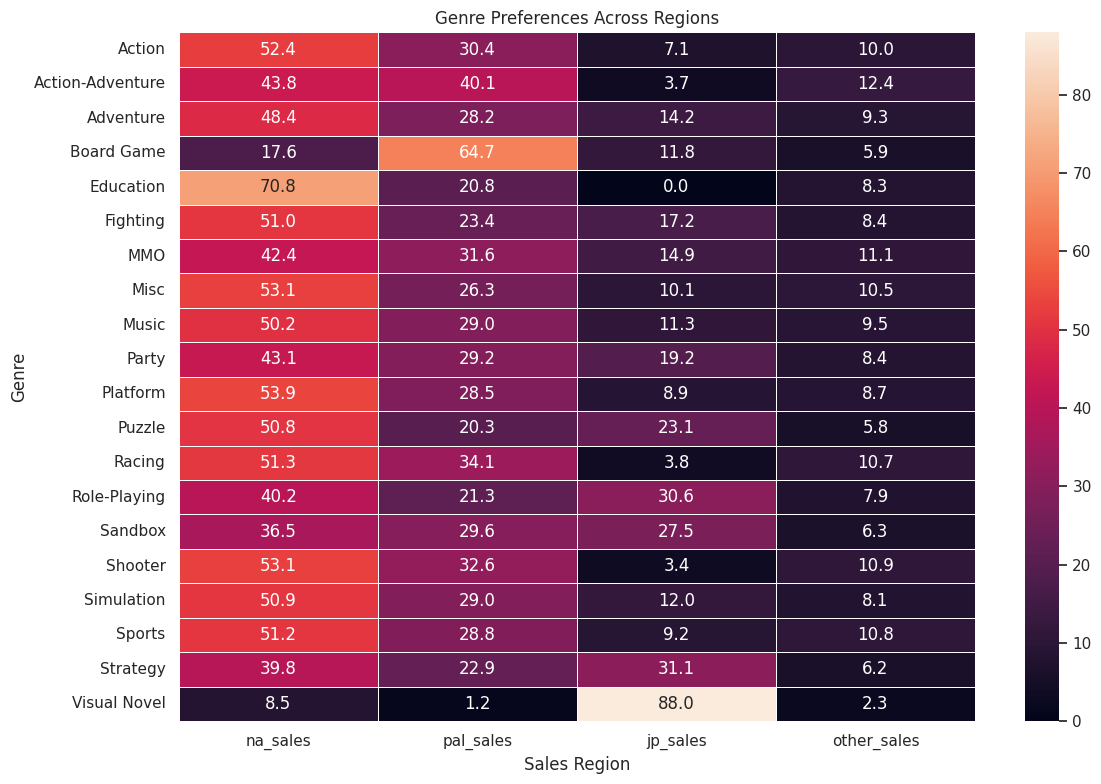

In [118]:
plt.figure(figsize=(12,8))
sns.heatmap(norm_genre_sales,annot=True,cmap='rocket',linewidths=.5,fmt='.1f')
plt.title('Sales Distribution by Genre')

plt.title('Genre Preferences Across Regions')
plt.xlabel('Sales Region')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

# Examine sales distribution in North america , Japan and PAL regions :

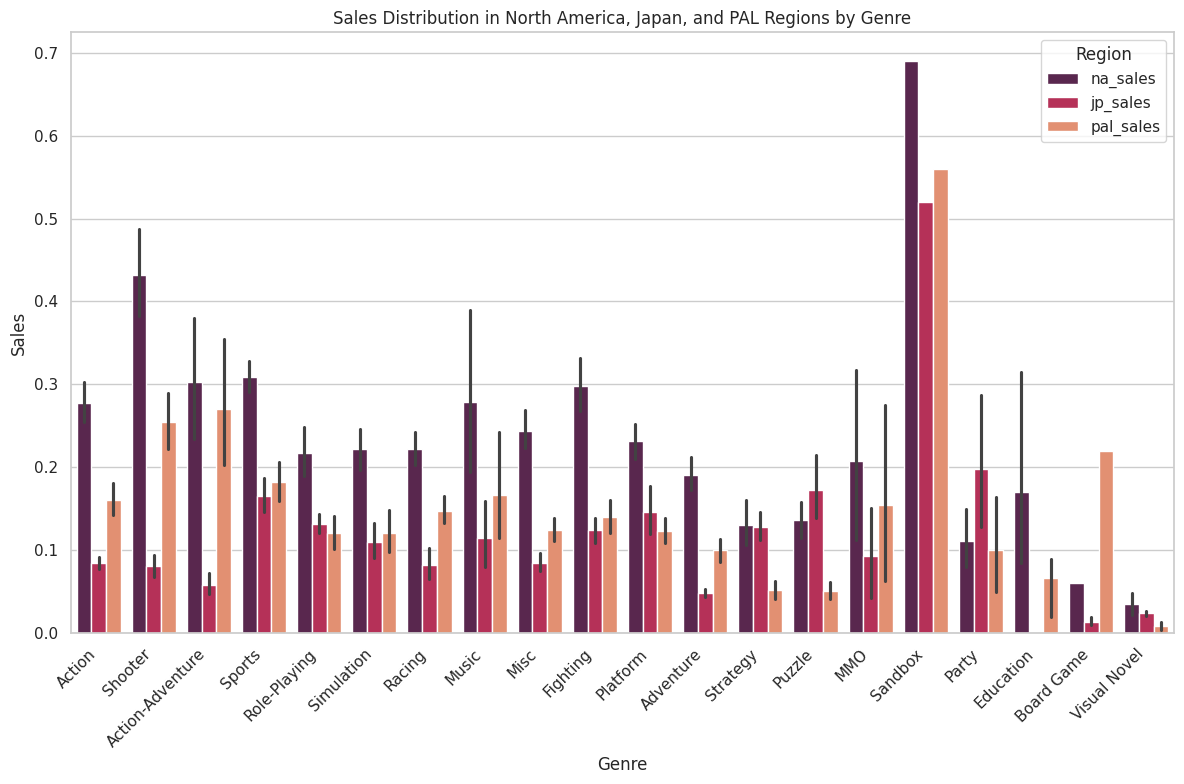

In [120]:
sales_data = df[['genre', 'na_sales', 'jp_sales', 'pal_sales']]

# Melt the DataFrame to long format for easier plotting
sales_data_melted = sales_data.melt(id_vars='genre', var_name='region', value_name='sales')

# Plot grouped bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=sales_data_melted, x='genre', y='sales', hue='region', palette='rocket')
plt.title('Sales Distribution in North America, Japan, and PAL Regions by Genre')
plt.xlabel('Genre')
plt.ylabel('Sales')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Region', loc='upper right')
plt.tight_layout()
plt.show()

# Compares Sales trends between older and newer platforms :

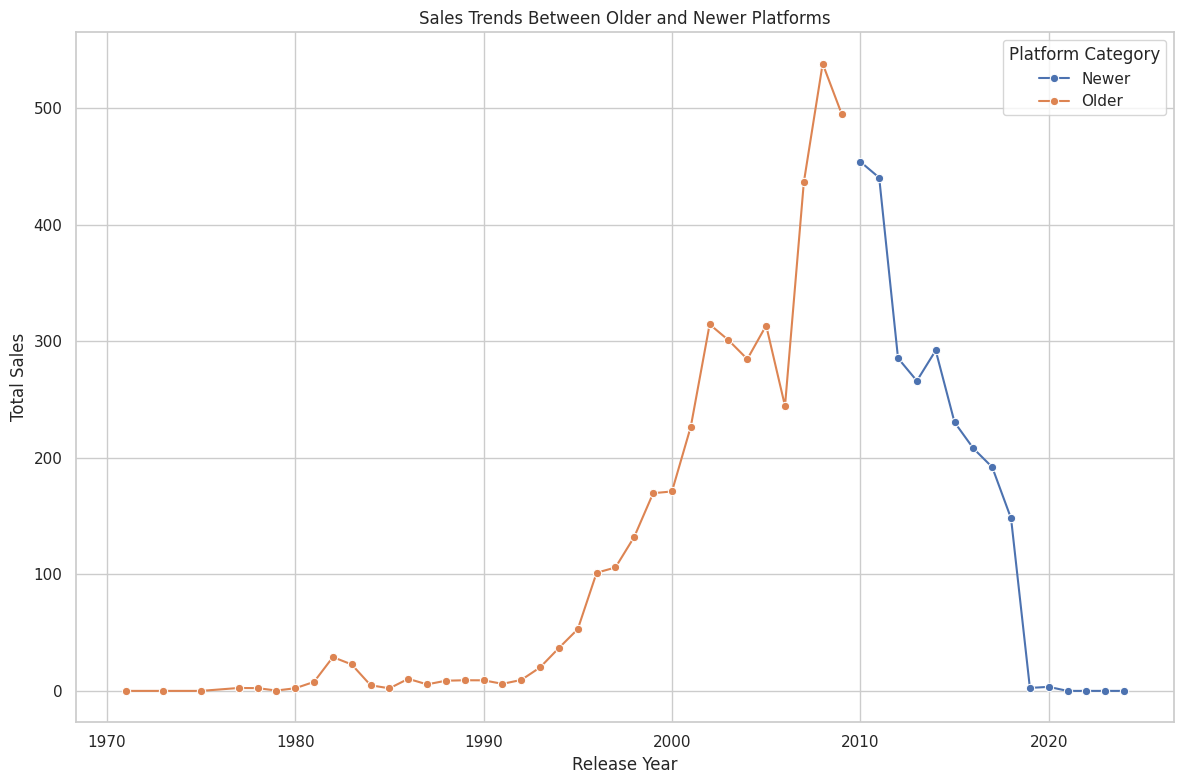

In [121]:
threshold_release_year = 2010

df['release_date'] = pd.to_datetime(df['release_date'])
df['platform_category'] = np.where(df['release_date'].dt.year < threshold_release_year, 'Older', 'Newer')
sales_trends = df.groupby(['platform_category', df['release_date'].dt.year])['total_sales'].sum().reset_index()
plt.figure(figsize=(12, 8))
sns.lineplot(data=sales_trends, x='release_date', y='total_sales', hue='platform_category', marker='o')
plt.title('Sales Trends Between Older and Newer Platforms')
plt.xlabel('Release Year')
plt.ylabel('Total Sales')
plt.legend(title='Platform Category')
plt.tight_layout()
plt.show()

# Platforms with highest average sales per game :

In [123]:
average_sales_per_game = df.groupby('console')['total_sales'].mean().sort_values(ascending=False)
average_sales_per_game

,total_sales
console,
GBC,1.446667
NES,0.998542
GEN,0.697407
X360,0.660361
PS3,0.622923
...,...
WinP,NaN
XS,NaN
ZXS,NaN


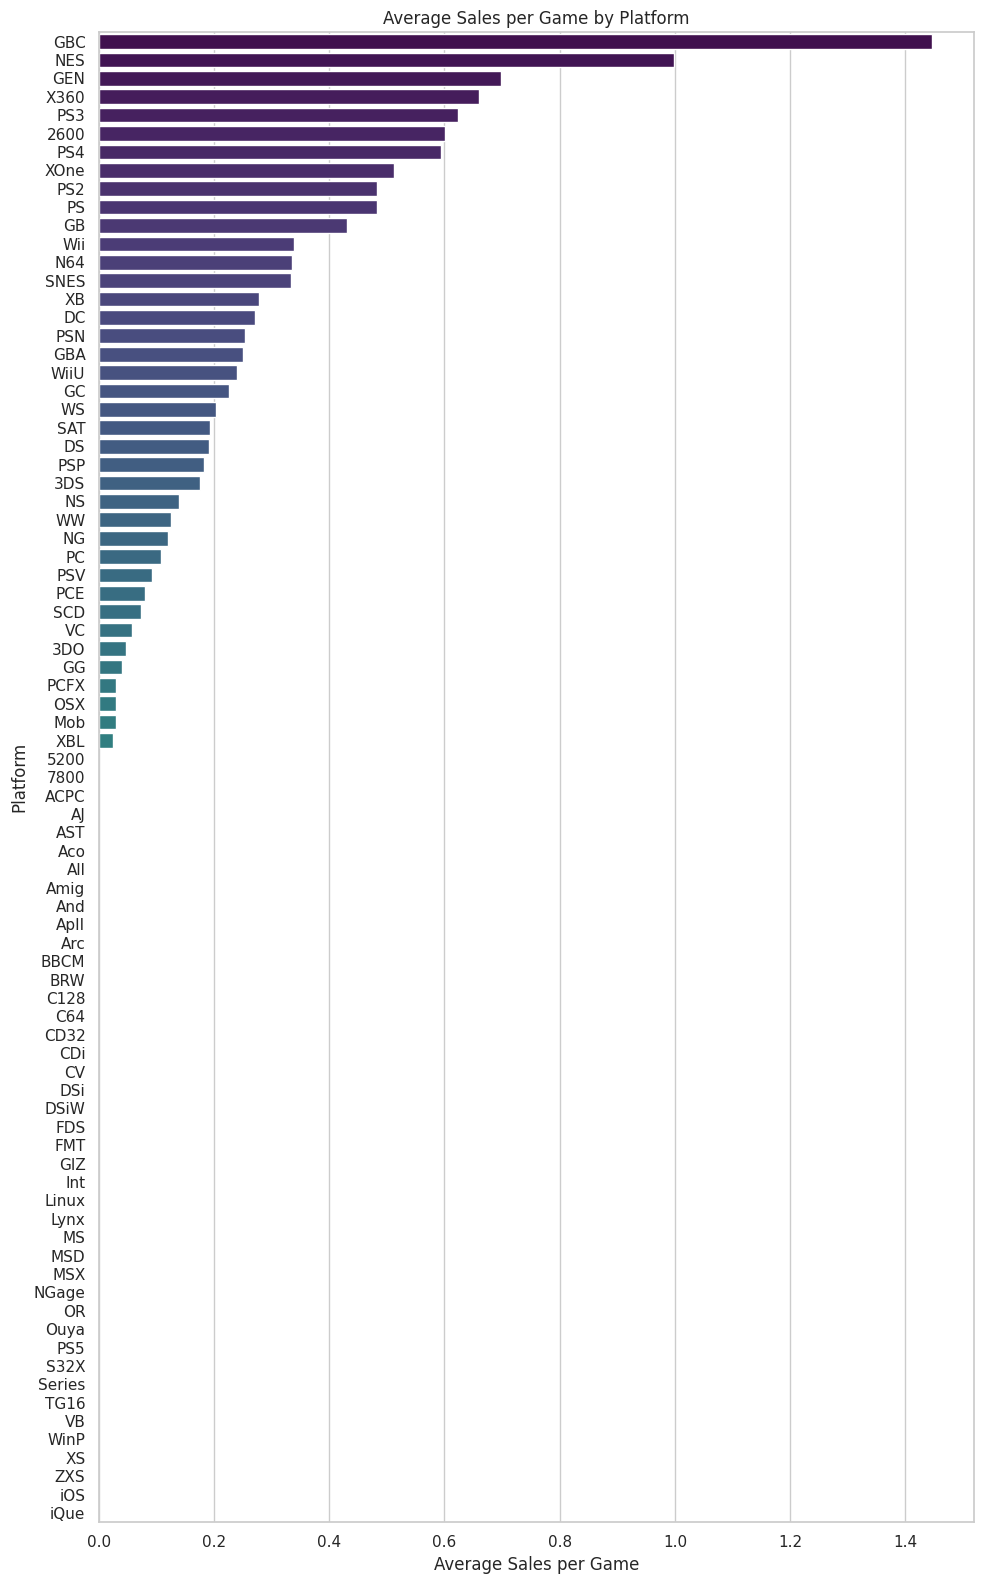

In [125]:
# Plotting the bar plot
plt.figure(figsize=(10, 16))
sns.barplot(x=average_sales_per_game.values, y=average_sales_per_game.index, palette='viridis')
plt.xlabel('Average Sales per Game')
plt.ylabel('Platform')
plt.title('Average Sales per Game by Platform')
plt.tight_layout()
plt.show()

# Release date Impact :

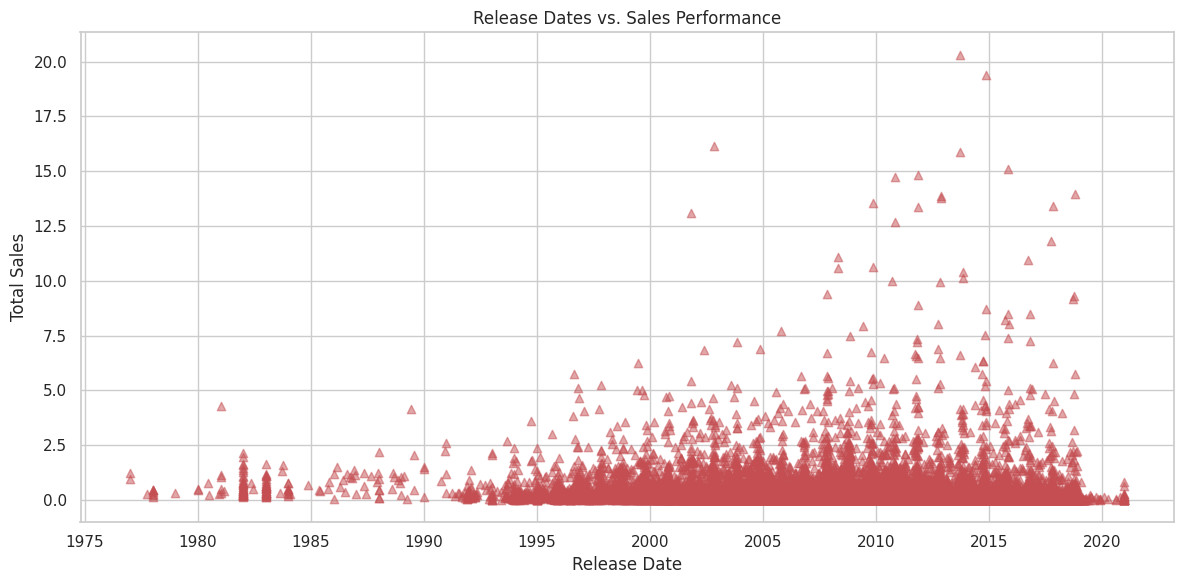

In [126]:
df['release_date'] = pd.to_datetime(df['release_date'])

# Plotting the scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(df['release_date'], df['total_sales'], alpha=0.5,c='r',marker='^')
plt.title('Release Dates vs. Sales Performance')
plt.xlabel('Release Date')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

# Developer Influence

In [127]:
developer_stats = df.groupby('developer').agg({'critic_score': 'mean', 'total_sales': 'sum'}).reset_index()

developer_stats_sample = developer_stats.sample(n=1000, random_state=42)

In [133]:
top_10_critic_score = developer_stats.sort_values(by=['critic_score','total_sales'],kind='quicksort', ascending=[False,False])
filtered_stats = top_10_critic_score[top_10_critic_score['total_sales'] >= 10].head(10)
filtered_stats

,developer,critic_score,total_sales
6362,Rockstar Games,9.800000,19.71
4945,Mojang,9.400000,17.81
5137,Naughty Dog,9.083333,23.47
6366,Rockstar North,9.060870,116.91
7951,Ubisoft Quebec,9.050000,12.32
6374,Rocksteady Studios,9.025000,25.48
1074,Blizzard Entertainment,8.928571,13.60
1248,Bungie,8.900000,33.44
7885,Turn 10 Studios,8.900000,14.52
7374,TOSE,8.750000,16.87


# Games with sustained long-term sales :

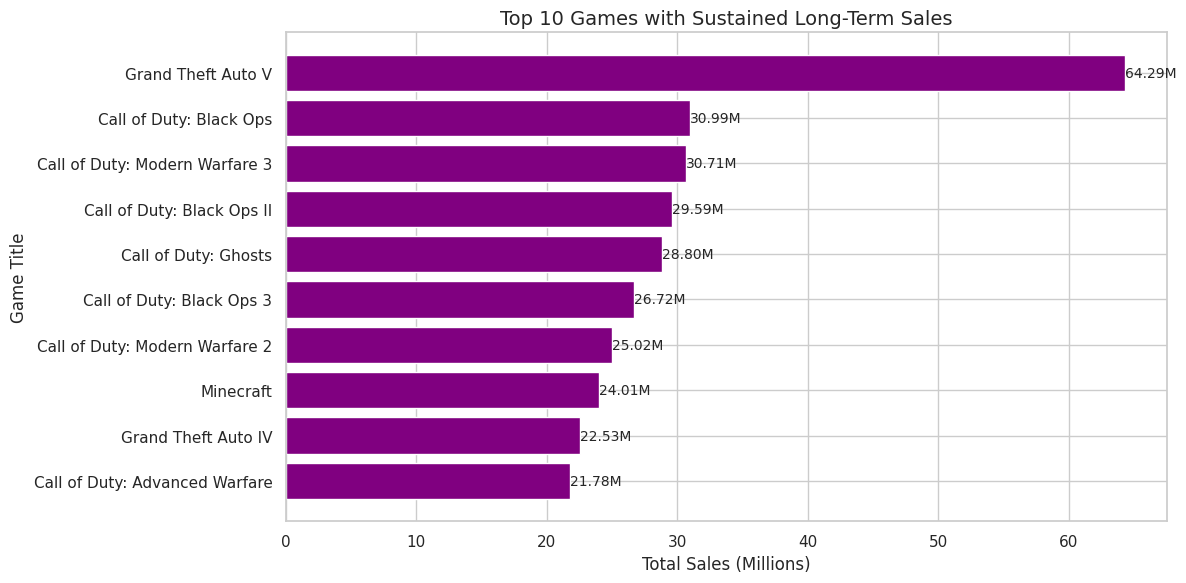

In [141]:
df['release_date'] = pd.to_datetime(df['release_date'])
long_term_period = pd.DateOffset(years=2)
df['long_term_end_date'] = df['release_date'] + long_term_period
long_term_sales = df.groupby('title')['total_sales'].sum().reset_index().sort_values(by='total_sales',ascending=False)


plt.figure(figsize=(12, 6))
top_n = 10
plt.barh(long_term_sales['title'].head(top_n), long_term_sales['total_sales'].head(top_n), color='purple')
plt.xlabel('Total Sales (Millions)', fontsize=12)
plt.ylabel('Game Title', fontsize=12)
plt.title(f'Top {top_n} Games with Sustained Long-Term Sales', fontsize=14)
plt.gca().invert_yaxis()

for index, value in enumerate(long_term_sales['total_sales'].head(top_n)):
    plt.text(value, index, f'{value:.2f}M', ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

# Impact of critic reviews on game performance :

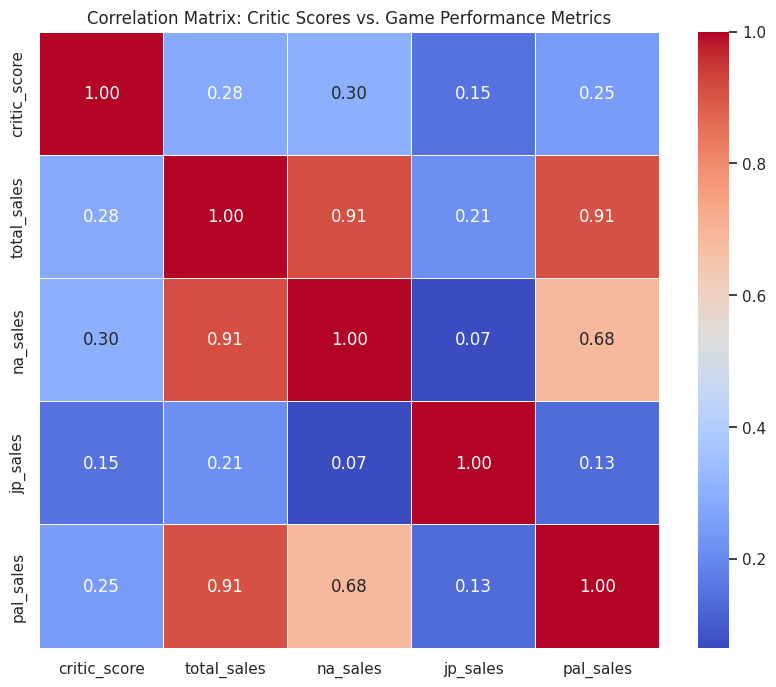

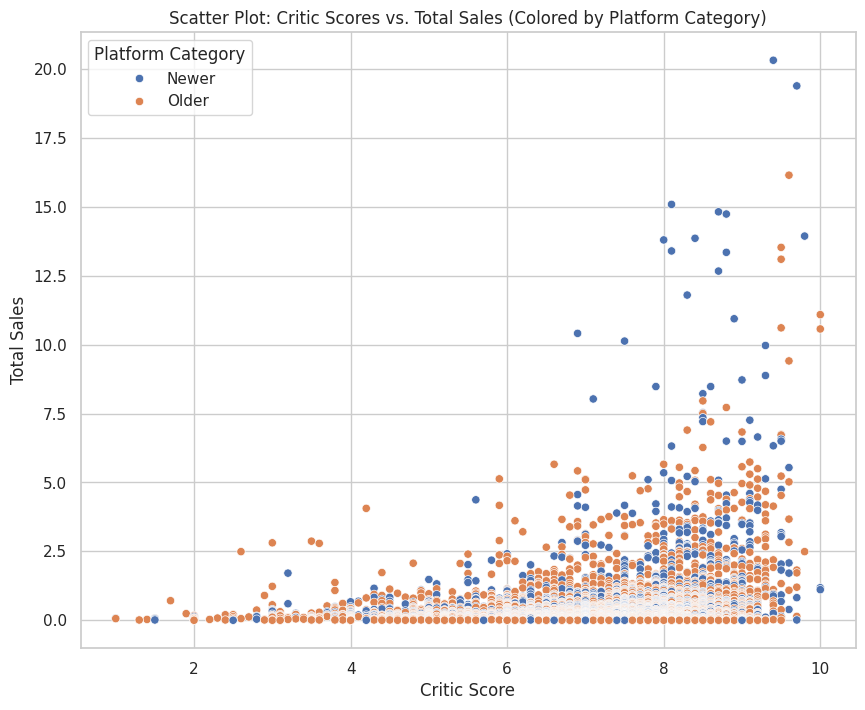

In [149]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['last_update'] = pd.to_datetime(df['last_update'])

df = df.reset_index(drop=True)

correlation_matrix = df[['critic_score', 'total_sales', 'na_sales', 'jp_sales', 'pal_sales']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix: Critic Scores vs. Game Performance Metrics')
plt.show()

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='critic_score', y='total_sales', hue='platform_category')
plt.title('Scatter Plot: Critic Scores vs. Total Sales (Colored by Platform Category)')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales')
plt.legend(title='Platform Category')
plt.show()